Machine Learning
Objetivo
El objetivo de la práctica es simple: abordar un problema de Machine Learning realista
siguiendo la metodología y buenas prácticas explicadas durante las clases teóricas. Por
tanto, en estas instrucciones no se especifican los pasos exactos que el alumno tiene que
llevar a cabo para realizar esta tarea con éxito; es parte del trabajo aplicar las técnicas de
procesamiento/transformación de variables que mejor se adecúen al problema, identificar
los modelos que proporcionen prestaciones óptimas, las variables potencialmente más
relevantes y la métrica adecuada para contrastar los distintos modelos. Aún así, se
proporciona una pequeña guía de los pasos necesarios. Las posibilidades son amplias, así
que es recomendable abordar una aproximación incremental: comenzar por soluciones
sencillas para progresivamente aumentar la complejidad de las técnicas utilizadas.
A diferencia de los datasets utilizados en las clases, este está compuesto por datos reales,
es decir, precisa de un análisis y limpieza mayores. Por el mismo motivo no se pretende
obtener unos resultados espectaculares, es suficiente con que sean decentes; se valorará
mucho más que el proceso seguido tenga sentido y no contenga errores graves de
concepto.
Conjunto de datos
El conjunto de datos escogido es (ver enlace en pdf), extraído de Airbnb mediante técnicas de scraping.
Dentro de las opciones recomiendo utilizar el extract (“Only the 14780 selected records”), ya
que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos
prestaciones.

Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.

1. Preparación de datos: División train/test

In [1]:
### Cargamos las librerias a utilizar durante los ejercicios

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos los datos del fichero csv de airbnb en un dataframe (df)
# En la lectura del csv se tiene que añadir delimitador para evitar errores de lectura, ya que el delimitador por defecto es la coma
df = pd.read_csv("airbnb-listings-extract.csv", delimiter=';')
df.head()


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


### Ahora vamos a quedarnos con una sola ciudad porque el data es muy extenso y algunas tareas demoran mucho tiempo, nos quedaremos solo con Madrid

In [2]:
df = df[df['City'] == 'Madrid']
df.dropna(subset=['Price'], inplace=True)
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",...,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,4941335,https://www.airbnb.com/rooms/4941335,20170407214119,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,12510355,https://www.airbnb.com/rooms/12510355,20170407214119,2017-04-08,Studio & Terrace - Barrio Salamanca,"Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...","Bright and refurbished studio, located in one ...",none,"The Studio is located in a quiet street, in th...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,3.28,"40.4283518893,-3.68715466311","Host Has Profile Pic,Host Identity Verified,Is..."
43,4756811,https://www.airbnb.com/rooms/4756811,20170407214119,2017-04-08,Cute single room -private bathroom,Nice single room in the best area of Madrid. T...,NaN,Nice single room in the best area of Madrid. T...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,7.0,0.57,"40.4274544347,-3.68576302323","Host Has Profile Pic,Is Location Exact,Require..."
44,15332216,https://www.airbnb.com/rooms/15332216,20170407214119,2017-04-08,Deluxe Apartment in Barrio Salamanca (next to IE),Located in the heart of Barrio de Salamanca. S...,"- Apartment of 68 square meters, modern buildi...",Located in the heart of Barrio de Salamanca. S...,none,Located in the heart of Salamanca district on ...,...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712","Host Has Profile Pic,Host Identity Verified,Is..."


2. Análisis exploratorio, por ejemplo:
    a. Head, describe, dtypes, etc.
    b. Outliers
    c. Correlación

a. Head, describe, dtypes, etc:

In [3]:
### Ahora vamos a cargar los datos para el entrenamiento y las pruebas, en un 80% y 20% respectivamente, 
# para ello vamos a hacer un split con el uso del metodoo train_test_split de la libreria sklearn

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df,test_size=0.2, random_state=0)

### Mostramos los datos cargados tras el split
print("Head de train: ")
print (train_data.head())

Head de train: 
             ID                            Listing Url       Scrape ID  \
3574   16060077  https://www.airbnb.com/rooms/16060077  20170407214119   
14016   8554556   https://www.airbnb.com/rooms/8554556  20170407214119   
8742   13430822  https://www.airbnb.com/rooms/13430822  20170407214119   
9472   10199228  https://www.airbnb.com/rooms/10199228  20170407214119   
3542     715965    https://www.airbnb.com/rooms/715965  20170407214119   

      Last Scraped                                Name  \
3574    2017-04-08   Private and nice room near Atocha   
14016   2017-04-08    COZY FLAT Imperial area A/C WiFi   
8742    2017-04-08            Casa Encendida Apartment   
9472    2017-04-08  Precioso Apto. a un paso de Atocha   
3542    2017-04-08    Apartment best location in town!   

                                                 Summary  \
3574   This flat with a very good location is 20 min ...   
14016  Bonito piso cerca del Palacio Real y la Catedr...   
8742   Sit

In [4]:
print("Describe de train: ")
print (train_data.describe())

Describe de train: 
                 ID     Scrape ID       Host ID  Host Response Rate  \
count  1.055800e+04  1.055800e+04  1.055800e+04         9222.000000   
mean   1.037932e+07  2.017041e+13  3.725026e+07           94.948601   
std    5.513216e+06  0.000000e+00  3.445913e+07           14.902843   
min    1.862800e+04  2.017041e+13  1.745300e+04            0.000000   
25%    5.811895e+06  2.017041e+13  7.478568e+06          100.000000   
50%    1.150716e+07  2.017041e+13  2.715772e+07          100.000000   
75%    1.532652e+07  2.017041e+13  5.737813e+07          100.000000   
max    1.810984e+07  2.017041e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         10556.000000               10556.000000  10558.000000   
mean              9.603259                   9.603259     40.420576   
std              26.799076                  26.799076      0.020039   
min               0.000000                   0.000000   

In [5]:
print("Dtypes de train: ")
print (train_data.dtypes)

Dtypes de train: 
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


Vamos a visualizar las columnas existentes para trabajar con ellas después

In [6]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

b. Outliers

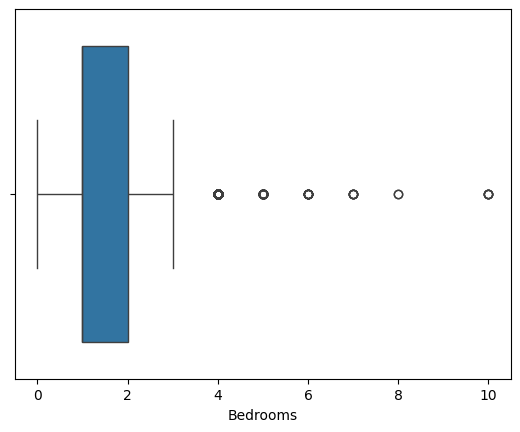

Outliers de las habitaciones:
             ID                            Listing Url       Scrape ID  \
4662   15224843  https://www.airbnb.com/rooms/15224843  20170407214119   
4033    3223298   https://www.airbnb.com/rooms/3223298  20170407214119   
10012   6013907   https://www.airbnb.com/rooms/6013907  20170407214119   
1533   17772989  https://www.airbnb.com/rooms/17772989  20170407214119   
10921    754678    https://www.airbnb.com/rooms/754678  20170407214119   
...         ...                                    ...             ...   
3900   11411014  https://www.airbnb.com/rooms/11411014  20170407214119   
14633   5099527   https://www.airbnb.com/rooms/5099527  20170407214119   
4709    1957859   https://www.airbnb.com/rooms/1957859  20170407214119   
11677    834562    https://www.airbnb.com/rooms/834562  20170407214119   
7697    1203151   https://www.airbnb.com/rooms/1203151  20170407214119   

      Last Scraped                                               Name  \
4662    

In [7]:
### Para ver la distribución y detectar los outliers, vamos a utilizar boxplot, y lo vamos a hacer de las habitaciones (Bedrooms)

sns.boxplot(x=train_data['Bedrooms'])
plt.show()

### En este caso los outliers serán los puntos de fuera del boxplot, o las conocidas líneas de bigotes,
# también considerando outliers, los aquellos puntos que estén 1,5 puntos más allá del IQR (rango intercualítico) 
# por encima del tercer (Q3) o primer cuartil (Q1)

# IQR = Q3 - Q1
Q3 = train_data['Bedrooms'].quantile(0.75)
Q1 = train_data['Bedrooms'].quantile(0.25)

IQR = Q3 - Q1

# Límites para outliers
bajo = Q1 - 1.5 * IQR
alto = Q3 + 1.5 * IQR

# Identificar outliers
outliers = train_data[(train_data['Bedrooms'] < bajo) | (train_data['Bedrooms'] > alto)]
print("Outliers de las habitaciones:")
print(outliers)


c. Correlación

C:\Users\Manu\AppData\Local\Temp\ipykernel_14944\2868741448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


<Axes: >

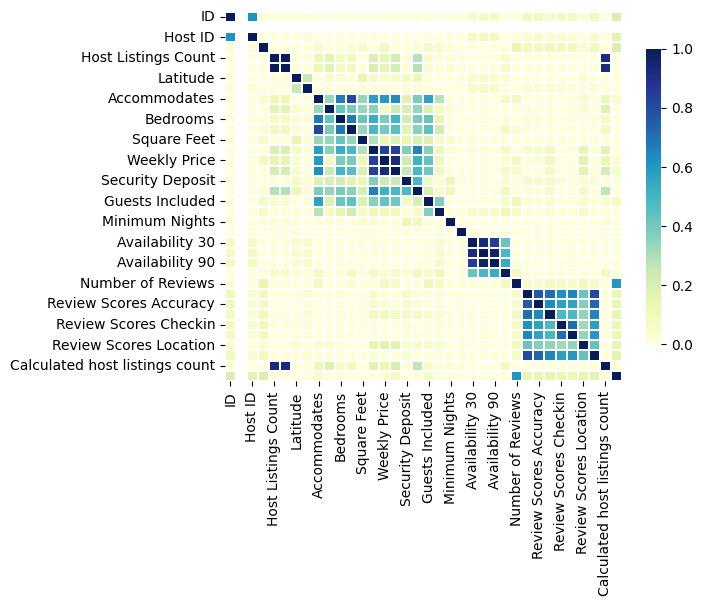

In [8]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

3. Preprocesamiento:
    a. Eliminación de variables, mediante selección (random forest/Lasso), alta
    correlación, alto porcentaje de missings, o el método que se considere
    oportuno.
    
    b. Generación de variables

a. Eliminación de variables, mediante selección (random forest/Lasso), alta
correlación, alto porcentaje de missings, o el método que se considere
oportuno.

In [9]:
### En este caso, se va a proceder a utilizar un método manual , de eliminiación de información no deseada
# donde se van a borrar columnas NO relevantes o identificadores únicos,
# y posteriormente actualizaremos train y test para su uso.
col_no_relevantes = ["ID", "Space", "Listing Url", "Scrape ID", "Last Scraped", "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host URL", 
"Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", "Host Listings Count", "Host Total Listings Count", "Host Verifications", "Latitude", 
 "Longitude", "Calendar last Scraped","Neighbourhood Cleansed", "Neighbourhood Group Cleansed", "Country Code", "Country", "Jurisdiction Names", 
 "Calculated host listings count", "State", "Market", "Smart Location", "Accommodates", "Amenities", "License", "Geolocation", "Features"]
train_data = train_data.drop(columns=col_no_relevantes)
test_data = test_data.drop(columns=col_no_relevantes)

b. Generación de variables

In [10]:
### En este caso me parece calcular la media de precio por cada vecindario en el conjunto de entrenamiento
neighborhood_avg_price = train_data.groupby('Neighbourhood')['Price'].mean().reset_index()

# Creamos una nueva columna 'Neighbourhood Average Price' en el conjunto train, a la cual le asignamos el valor Price_avg,
# que le hemos añadido el sufijo para crear una "copia" de Price y no perder el valor Price como tal

train_data = pd.merge(train_data, neighborhood_avg_price, on='Neighbourhood', how='left', suffixes=('', '_avg'))
train_data['Neighbourhood Average Price'] = train_data['Price_avg']

# Hacemos lo mismo para el conjunto test
test_data = pd.merge(test_data, neighborhood_avg_price, on='Neighbourhood', how='left', suffixes=('', '_avg'))
test_data['Neighbourhood Average Price'] = test_data['Price_avg']


In [11]:
train_data.columns

Index(['Name', 'Summary', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host ID', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Street', 'Neighbourhood', 'City', 'Zipcode',
       'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', '

In [12]:
train_data

,Name,Summary,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price_avg,Neighbourhood Average Price
0,Private and nice room near Atocha,This flat with a very good location is 20 min ...,This flat with a very good location is 20 min ...,none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,2.45,NaN,NaN
1,COZY FLAT Imperial area A/C WiFi,Bonito piso cerca del Palacio Real y la Catedr...,Bonito piso cerca del Palacio Real y la Catedr...,none,"El barrio es tranquilo, pero a su vez tienes l...",El Check in y Check out será flexible en la me...,Lugar muy bien comunicado para acceder a cualq...,Acceso directo a patio interior.,Llevamos siendo anfitriones de Airbnb bastante...,"No se permiten fiestas, ni reuniones que pueda...",...,9.0,9.0,10.0,10.0,9.0,9.0,moderate,2.77,48.325581,48.325581
2,Casa Encendida Apartment,Situado en el corazón de Madrid en el barrio d...,Situado en el corazón de Madrid en el barrio d...,none,The Lavapies neighborhood is one of the most e...,"Check-In: Cuando llegue al apartamento, les da...","If you like walking, in a pleasant few minutes...",You are renting a complete flat.,We would help you to know Madrid and we are av...,Queremos que cuides la casa como si fuera tuya...,...,10.0,10.0,10.0,10.0,9.0,10.0,moderate,4.72,63.010989,63.010989
3,Precioso Apto. a un paso de Atocha,"Ubicado en el barrio de Las Letras, en una cal...","Ubicado en el barrio de Las Letras, en una cal...",none,Barrio de las Letras una estupenda zona de mad...,NaN,estación Atocha a 1 minuto estación Anton Mart...,"Servicios muy cercanos, estación de metro Atoc...",Sera un placer ayudarles y brindarles toda la ...,"Nuestra principal norma, que disfrutes al máxi...",...,10.0,10.0,10.0,10.0,10.0,9.0,moderate,6.33,84.357631,84.357631
4,Apartment best location in town!,NaN,Wonderful apartment in the city center of Madr...,none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,10.0,10.0,9.0,flexible,0.33,85.396127,85.396127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,"Bright and cozy apartment in Aravaca Soho, Madrid","Bright and cozy apartment in Aravaca Town, 10´...","Bright and cozy apartment in Aravaca Town, 10´...",none,The apartment is surrounded by all kind of ser...,It´s not easy to park close to the house becau...,"The apartment is located in Aravaca Town, litt...",You could join the entire apartment and commun...,I´ll be available on my cell for my guest.,"Únete a las cosas con respeto y amor, igual qu...",...,10.0,10.0,10.0,10.0,6.0,8.0,flexible,1.15,NaN,NaN
10554,MALASAÑA RELAXED & COOL APARTMENT,You will love my apartment for his style and c...,You will love my apartment for his style and c...,none,NaN,NaN,NaN,NaN,NaN,"Es una comunidad tranquila y familiar, se rueg...",...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.63,NaN,NaN
10555,Loft en el Madrid de los Austrias,"Situado en el centro histórico de Madrid, es u...","Situado en el centro histórico de Madrid, es u...",none,"Situado a 200m del Palacio Real, el apartament...",Estare disponible o alguna persona allegada a ...,"Al estar a 300metros de la Plaza Mayor, a 150 ...",El huesped tendra acceso a todo el apartamento...,Asesoraremos a lo huéspedes si asi lo necesita...,"No se admiten animales, y se espera que se res...",...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,70.928571,70.928571
10556,Habitación junto a la Castellana,"Habitación exterior, cama de de matrimonio y b...","Habitación exterior, cama de de matrimonio y b...",none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.06,NaN,NaN


4. Modelado:
    a. Cross validation
    b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
    comparar entre ellos.

a. Cross validation y b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
    comparar entre ellos.

(este punto lo hacemos de forma conjunta, mismo codigo, para luego hacer comparación)

In [13]:
### Ahora vamos a hacer el ejercicio de Cross Validation para poder evaluar el rendimiento del modelo, 
# para ello, en este caso, vamos a utilizar el método random forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### Los siguientes 3 pasos, los vamos a realizar para evitar error de codificacion de columnas
# Identificamos variables categóricas
cat_Columns = train_data.select_dtypes(include=['object']).columns

# Aplicamos codificación One-Hot Encoding
train_data_codificada = pd.get_dummies(train_data, columns=cat_Columns)

# Rellenamos los valores faltantes con cero
train_data_codificada = train_data_codificada.fillna(0)  

### Ahora ya podemos trabajar con los datos sin problema

### Vamos a reducir la muestra a un 10% para poder sacar resultados sin que demore la máquina

train_data_codificada = train_data_codificada.sample(frac=0.1)

# Definimos características (X) y variable objetivo (y)
x = train_data_codificada.drop(['Price'], axis=1)
y = train_data_codificada['Price']

# Inicializamos los modelos con los métodos elegidos random fores y regresión lineal
mrf = RandomForestRegressor(random_state=40, n_estimators=100)
mrl = LinearRegression()

# Creamos la validación cruzada con 5 folds para Random Forest haciendo uso del error cuadrático medio negativo como una medida de evaluación
random_forest_crossVal = cross_val_score(mrf, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_random_forest = np.sqrt(-random_forest_crossVal)

# Creamos validación cruzada con 5 folds para Regresión Lineal haciendo uso del error cuadrático medio negativo como una medida de evaluación
regLineal_crossVal = cross_val_score(mrl, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_regLineal = np.sqrt(-regLineal_crossVal)

# Resultado final de ambas evaluaciones
print("RMSE vía Random Forest:", rmse_random_forest.mean())
print("RMSE vía Regresión Lineal:", rmse_regLineal.mean())



RMSE vía Random Forest: 42.27773849800501
RMSE vía Regresión Lineal: 47.500557393034406


5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente

En este estudio de datos de Airbnb para machine learning, se han separado los datos en entrenamiento y prueba.

Se ha realizado un análisis exploratorio y se ha llevado a cabo un preprocesamiento que ha incluido la eliminación de variables no relevantes
y la creación de una nueva variable Price_avg, para conocer la media de precio por barrio

Por otro lado, se han realizado unas evaluaciones con modelos random forest y regresión lineal, para poder comparar su comportamiento del error cuadrático medio negativo